## Creating graphs the whole dataset for file sizes and number of rows 

##### @authors: Abhijeet Amle, Roshan Bhandari, Abhimanyu Abhinav

In [ ]:
size_dict = {'upto_10K': 0, '10K_500K': 0, '500K_1M': 0, '1M_10M': 0, '10M_1G': 0, '1G+': 0}
size = set(['M', 'K', 'G'])
count_exceptions = 0
size_dict

{'10K_500K': 0,
 '10M_1G': 0,
 '1G+': 0,
 '1M_10M': 0,
 '500K_1M': 0,
 'upto_10K': 0}

In [ ]:
with open('/content/file_sizes.txt', 'r') as filesize:
    for line in filesize:
        if line[-2] in size:
            num = float(line[:-2])

            if line[-2] == 'K':
                if (500 >= num >= 10):
                    size_dict['10K_500K'] += 1
                elif (num > 500):
                    size_dict['500K_1M'] += 1
                else:
                    size_dict['upto_10K'] += 1  
                
            elif line[-2] == 'M':
                if (num > 10):
                    size_dict['10M_1G'] += 1
                else:
                    size_dict['1M_10M'] += 1 

            elif line[-2] == 'G':
                size_dict['1G+'] += 1

            else:
                count_exceptions += 1
                
        else:
            size_dict['upto_10K'] += 1

In [ ]:
print(size_dict)

{'upto_10K': 1225, '10K_500K': 7361, '500K_1M': 1926, '1M_10M': 520, '10M_1G': 553, '1G+': 27}


In [ ]:
count_exceptions

0

In [ ]:
for key in size_dict:
    print(key, "-", size_dict[key])

upto_10K - 1225
10K_500K - 7361
500K_1M - 1926
1M_10M - 520
10M_1G - 553
1G+ - 27


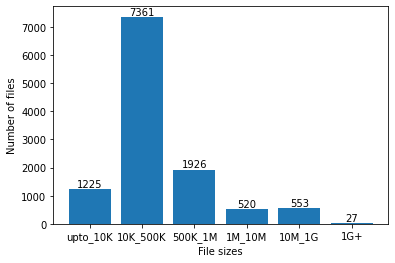

In [ ]:
import matplotlib.pyplot as plt

keys = list(size_dict.keys())
values = list(size_dict.values())

line = plt.bar(keys, values)

plt.xlabel('File sizes')
plt.ylabel("Number of files")

for i in range(len(size_dict)):
    plt.annotate(str(values[i]), xy=(keys[i],values[i]), ha='center', va='bottom')

plt.savefig("1.png")
plt.show()

In [ ]:
from collections import defaultdict
linecount_dict = defaultdict(int)
with open('/content/linecount.txt', 'r') as linecountfile:
    for line in linecountfile:
        line = line.strip()
        num = int(line.split()[0])
        linecount_dict[num] += 1


In [ ]:
min(linecount_dict)

0

In [ ]:
max(linecount_dict)

123235362

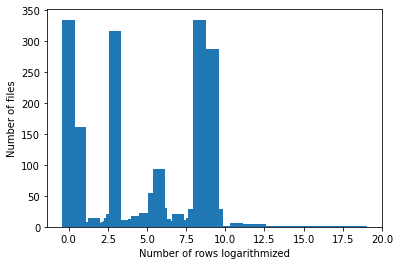

In [ ]:
import matplotlib.pyplot as plt
import math

keys = list(linecount_dict.keys())
values = list(linecount_dict.values())

keys_new = [0] * len(keys)

for i in range(len(keys)):
    if keys[i] != 0:
        keys[i] = math.log(keys[i])

line = plt.bar(keys, values)

plt.xlabel('Number of rows logarithmized')
plt.ylabel("Number of files")

plt.savefig("2.png")
plt.show()